In [1]:
import ipython_import
import JDFS
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
SEED = 2018
from sklearn import metrics

importing Jupyter notebook from JDFS.ipynb


In [2]:
path_node1 = ['/home/luguangcheng/UAVnew/train_data_node1_0418.csv','/home/luguangcheng/UAVnew/test_data_node1_0418.csv']
path_node2 = ['/home/luguangcheng/UAVnew/train_data_node2_0418.csv','/home/luguangcheng/UAVnew/test_data_node2_0418.csv']
path_node3 = ['/home/luguangcheng/UAVnew/train_data_node3_0418.csv','/home/luguangcheng/UAVnew/test_data_node3_0418.csv']
path_node4 = ['/home/luguangcheng/UAVnew/train_data_node4_0418.csv','/home/luguangcheng/UAVnew/test_data_node4_0418.csv']
path_node5 = ['/home/luguangcheng/UAVnew/train_data_node5_0418.csv','/home/luguangcheng/UAVnew/test_data_node5_0418.csv']
path_set=[path_node1,path_node2,path_node3,path_node4,path_node5]

In [3]:
def read_path(path):
    train_data = pd.read_csv(path[0],header=0) #全部数据中的训练部分
    test_data = pd.read_csv(path[1],header=0) #全部数据中的测试部分
    X_train = train_data.drop('label',axis=1)
    y_train = train_data['label']
    X_test = test_data.drop('label',axis=1)
    y_test = test_data['label']
    return X_train,y_train,X_test,y_test

In [4]:
def model_stacking(path_set,ntrain,ntest):    
    train_stack = np.empty((ntrain,len(path_set)))
    test_stack = np.empty((ntest,len(path_set)))
    for i in range(len(path_set)):
        x_train,y_train,x_test,y_test = read_path(path_set[i])
        # 特征选择与模型训练
        sorted_feature = JDFS.feature_sort(x_train,y_train) #对特征进行排序
        feature,score,clf = JDFS.feature_selection(x_train,y_train,sorted_feature)
        x_train = x_train[feature]
        x_test = x_test[feature]
        x_train = np.array(x_train)
        x_test = np.array(x_test)
        oof_train,oof_test = get_oof(clf,x_train,y_train,x_test)
        train_stack[:,i] = oof_train
        test_stack[:,i] = oof_test
    lr = LogisticRegression()
    lr.fit(train_stack,y_train)
    y_pre = lr.predict(test_stack)
    accuracy = metrics.accuracy_score(y_test,y_pre)
    return y_test,y_pre,train_stack,test_stack,accuracy

In [5]:
def get_oof(clf,x_train,y_train,x_test):
    ntrain = x_train.shape[0]
    ntest = x_test.shape[0]
    kf = KFold(n_splits=5,random_state=SEED)
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((5,ntest))
    for i,(train_index,test_index) in enumerate(kf.split(x_train)):
        kf_x_train = x_train[train_index]
        kf_y_train = y_train[train_index]
        kf_x_test = x_train[test_index]
        clf.fit(kf_x_train,kf_y_train)
        oof_train[test_index] = clf.predict(kf_x_test)
        oof_test_skf[i,:] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    oof_test = map(lambda x:1 if x>0.5 else 0,oof_test)
    oof_test = np.array(oof_test)
    return oof_train,oof_test

In [6]:
y_test,y_pre,train_stack,test_stack,accuracy = model_stacking(path_set,5000,1000)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, categ

In [7]:
a = pd.DataFrame(test_stack)
a

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0


In [12]:
a.iloc[range(300,400),:]

,0,1,2,3,4
300,1.0,1.0,1.0,1.0,0.0
301,1.0,1.0,1.0,1.0,0.0
302,1.0,1.0,1.0,1.0,0.0
303,1.0,1.0,1.0,1.0,0.0
304,1.0,1.0,1.0,1.0,0.0
305,1.0,1.0,1.0,1.0,0.0
306,1.0,1.0,1.0,1.0,0.0
307,1.0,1.0,1.0,1.0,0.0
308,1.0,1.0,1.0,1.0,0.0
309,1.0,1.0,1.0,1.0,0.0


In [9]:
a.mean(axis=0)

0    0.400
1    0.400
2    0.403
3    0.400
4    0.300
dtype: float64

In [11]:
accuracy

0.5

In [13]:
y_pre

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [19]:
oof_train = np.zeros((5,))
#oof_train = oof_train.reshape(-1,1)
oof_train

array([ 0.,  0.,  0.,  0.,  0.])

In [17]:
train_stack = np.ones((5,3))
train_stack

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [20]:
train_stack[:,1] = oof_train

In [22]:
train_stack.mean(axis=0)

array([ 1.,  0.,  1.])

In [23]:
oof_test = np.zeros((3,))

In [24]:
oof_test[:] = train_stack.mean(axis=0)
oof_test

array([ 1.,  0.,  1.])

In [25]:
oof_test = map(lambda x:1 if x>0.5 else 0,oof_test)
oof_test

[1, 0, 1]

In [26]:
oof_test = np.array(oof_test)
oof_test

array([1, 0, 1])

In [7]:
x_train,y_train,x_test,y_test = read_path(path_set[0])

In [15]:
x_train = np.array(x_train)
x_train

array([[ 0.96539136,  0.97916092,  0.99965284, ...,  0.13793103,
         0.15384615,  0.65384615],
       [ 0.92262017,  0.98518812,  0.99965309, ...,  0.17241379,
         0.13461538,  0.61538462],
       [ 0.93398238,  0.98924137,  0.99962235, ...,  0.31034483,
         0.11538462,  0.38461538],
       ..., 
       [ 0.12742643,  0.14662497,  0.05645782, ...,  0.89655172,
         0.78846154,  0.57692308],
       [ 0.10350127,  0.11303491,  0.05918372, ...,  0.51724138,
         0.78846154,  0.65384615],
       [ 0.11751184,  0.06769057,  0.03288643, ...,  0.37931034,
         0.86538462,  0.57692308]])

In [11]:
kf = KFold(n_splits=5,random_state=SEED)
print enumerate(kf.split(x_train))

In [18]:
for train_index,test_index in kf.split(x_train):
    print train_index,test_index
    kf_x_train = x_train[train_index]
    kf_y_train = y_train[train_index]
    kf_x_test = x_train[test_index]

[1000 1001 1002 ..., 4997 4998 4999] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 2

In [ ]:
# 预测
clf.predict(X_test[feature])

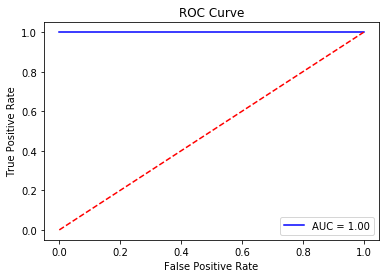

In [4]:
# 画ROC曲线
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

actual = [1,1,1,0,0,0]   #实际值
predictions = [0.9,0.9,0.9,0.1,0.1,0.1]   #预测概率
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)  #根据不同阈值得到的虚警率与召回率
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')  #基准线
#plt.xlim([-0.1,1.2])
#plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [7]:
np.where(np.diff(predictions))

(array([2]),)